
# What drives the price of a car?
<center> 
    <img src = images/KURT.JPG width = 10%/>
</center>

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/CRISP.JPG width = 10%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

<hr style="border: dashed 1px #000;">
<ol style="font-family: 'Times New Roman', Times, serif;">
<li style="color:Red"> <span style="color:Red; font-size:15px;font-weight: bold;"> Tasks Involved: </span></li>
<ul>
<li style="color:Red"> <span style="color:Red; font-size:15px;">Develop a predictive modeling framework to estimate used car prices based on a variety of features. </span></li>
<li style="color:Red"> <span style="color:Red; font-size:15px;">Perform exploratory data analysis to identify potential predictors of car prices, such as make, model, year, mileage, and condition.</span></li>
<li style="color:Red"> <span style="color:Red; font-size:15px;">Construct a regression model that can quantify the impact of these features on the car's price. Key tasks include feature selection, model training, and validation to ensure the model accurately captures the relationship between car attributes and their market values.</span></li>
<li style="color:Red"> <span style="color:Red; font-size:15px;">Pinpoint the most influential factors affecting used car prices and provide actionable insights for pricing strategies.</span></li>
</ul>
</ol>

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

<hr style="border: dashed 1px #000;">
 

<ol style="font-family: 'Times New Roman', Times, serif;">
    <li style="color:Red"> <span style="color:Red; font-size:15px;font-weight: bold;"> Data Exploration: </span></li>
    <ul>
        <li style="color:Red"> <span style="color:Red; font-size:15px;">Begin by examining the structure of the dataset. How many columns and rows does it contain?</span></li>
        <li style="color:Red"> <span style="color:Red; font-size:15px;">Print out the first few rows of the dataset to get a sense of what the data looks like.</span></li>
        <li style="color:Red"> <span style="color:Red; font-size:15px;">Check the data types of each column. Are they numerical, categorical, or date-time?</span></li>
        <li style="color:Red"> <span style="color:Red; font-size:15px;">Look for any missing values in the dataset. How prevalent are they, and how might they affect your analysis?</span></li>
    </ul>
    <li style="color:Red"> <span style="color:Red; font-size:15px;font-weight: bold;"> Column Analysis: </span></li>
    <ul>
        <li style="color:Red"> <span style="color:Red; font-size:15px;">Examine the unique values in categorical columns. Are there any unexpected or invalid values?</span></li>
        <li style="color:Red"> <span style="color:Red; font-size:15px;">For numerical columns, check for outliers. Are there any values that seem unreasonable or far from the central tendency of the data?</span></li>
        <li style="color:Red"> <span style="color:Red; font-size:15px;">Check for consistency in date-time columns. Are all dates formatted correctly, and do they fall within expected ranges?</span></li>
    </ul>
    <li style="color:Red"> <span style="color:Red; font-size:15px;font-weight: bold;"> Data Quality Assessment: </span></li>
    <ul>
        <li style="color:Red"> <span style="color:Red; font-size:15px;">Assess the completeness of the dataset. Are there any columns with a high proportion of missing values?</span></li>
        <li style="color:Red"> <span style="color:Red; font-size:15px;">Look for duplicates in the dataset. Are there any rows that are exact duplicates or nearly identical duplicates?</span></li>
    </ul>
    <li style="color:Red"> <span style="color:Red; font-size:15px;font-weight: bold;"> Visualization: </span></li>
    <ul>
        <li style="color:Red"> <span style="color:Red; font-size:15px;">Create visualizations such as histograms, box plots, or scatter plots to explore the relationships between variables and identify any patterns or trends.</span></li>
        <li style="color:Red"> <span style="color:Red; font-size:15px;">Visualize missing data patterns to understand if there are any systematic issues with missing values.</span></li> 
    </ul>
</ol>



In [13]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error 
from sklearn.inspection import permutation_importance 
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn import set_config
from category_encoders import TargetEncoder
set_config(display="diagram")
 
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:/ML-AI Training/PA2/data/vehicles.csv") 
df.sample(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
425022,7316891640,northern WI,12995,2010.0,ram,1500,good,8 cylinders,gas,135267.0,clean,automatic,1D7RV1GTXAS235578,4wd,full-size,truck,black,wi
36269,7309127138,merced,31590,2018.0,bmw,4 series 430i convertible 2d,good,NaN,gas,48667.0,clean,other,WBA4Z1C56JEC60475,rwd,NaN,convertible,silver,ca
288090,7304220744,akron / canton,6499,1999.0,ford,f-250,NaN,NaN,other,214017.0,clean,automatic,1FTNX21S4XEE88380,4wd,NaN,pickup,white,oh
133277,7312780734,boise,7395,2011.0,ford,fusion,NaN,4 cylinders,gas,116943.0,clean,other,3FAHP0HA5BR139724,fwd,NaN,sedan,NaN,id
14829,7315029046,tucson,10499,2017.0,dodge,grand caravan,excellent,NaN,gas,114850.0,clean,automatic,2C4RDGBGXHR725878,fwd,NaN,mini-van,white,az


### Interpretation of Descriptive and Inferential statistics
<span style="background-color: yellow; padding: 3px; font-weight: bold;">Descriptive and Inferential Stats</span>

In [3]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
df.describe() 

,id,price,year,odometer
count,426880,426880,425675,422480
mean,7311486634,75199,2011,98043
std,4473170,12182282,9,213882
min,7207408119,0,1900,0
25%,7308143339,5900,2008,37704
50%,7312620821,13950,2013,85548
75%,7315253544,26486,2017,133542
max,7317101084,3736928711,2022,10000000


In [4]:
info_df = pd.DataFrame({'Column': df.columns,'Non-Null Count': df.notnull().sum(),'Dtype': df.dtypes}).reset_index(drop=True)
info_df

,Column,Non-Null Count,Dtype
0,id,426880,int64
1,region,426880,object
2,price,426880,int64
3,year,425675,float64
4,manufacturer,409234,object
5,model,421603,object
6,condition,252776,object
7,cylinders,249202,object
8,fuel,423867,object
9,odometer,422480,float64


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 
<span style="background-color: yellow; padding: 3px; font-weight: bold;">Check for null rows and drop them</span>

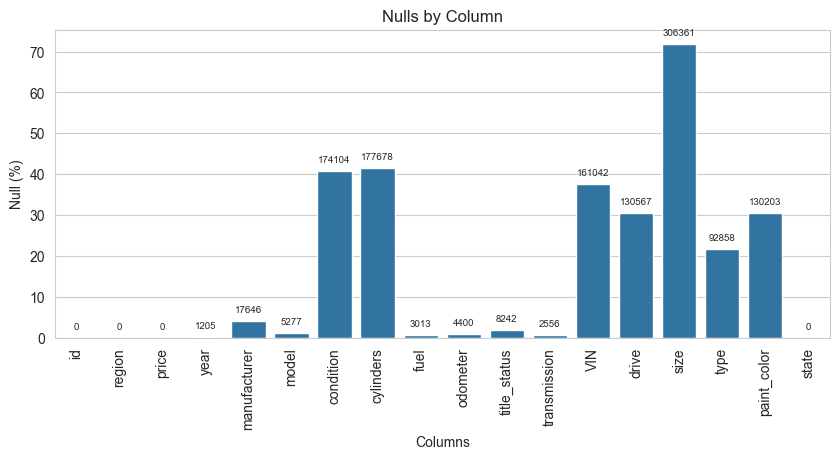

In [5]:
count_null = df.isnull().sum()
percent_null = count_null * 100 / len(df)
missing_df = pd.DataFrame({"col_name": df.columns, "percent_null": np.round(percent_null, 2), "count_null": count_null})

# Create the plot
plt.figure(figsize=(10, 4))
fig = sns.barplot(x="col_name", y="percent_null", data=missing_df)
plt.xticks(rotation=90)
fig.set(xlabel="Columns", ylabel="Null (%)", title="Nulls by Column")

# Loop through the bars in the barplot (fig.patches) and add the data labels for count
for bar, label in zip(fig.patches, missing_df['count_null']):
    fig.annotate(f'{int(label)}',  # Use the actual count as the label
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),  
                 ha='center', va='center',  # center alignment
                 size=7, xytext=(0, 8),  # size of the text and its position
                 textcoords='offset points') 
plt.show()
df= df.dropna()

<span style="background-color: yellow; padding: 3px; font-weight: bold;">Check for the value named 'other' and manipulate it in a meaningful way</span>

In [6]:
other_occurrences = (df == 'other')
other_count_per_column = other_occurrences.sum()
total_other_count = other_count_per_column.sum()

print("Occurrences of 'other' per column:")
print(other_count_per_column)
print("\nTotal count of 'other' across the DataFrame:", total_other_count)

df['fuel'] = df['fuel'].replace({'other': 'other_fuel'})
df['cylinders'] = df['cylinders'].replace({'other': 'other_cylinders'})
df['type'] = df['type'].replace({'other': 'other_type'})
df['transmission'] = df['transmission'].replace({'other': 'other_transmission'})

Occurrences of 'other' per column:
id                0
region            0
price             0
year              0
manufacturer      0
model             0
condition         0
cylinders        96
fuel             32
odometer          0
title_status      0
transmission    699
VIN               0
drive             0
size              0
type             99
paint_color       0
state             0
dtype: int64

Total count of 'other' across the DataFrame: 926


<span style="background-color: yellow; padding: 3px; font-weight: bold;">Check for duplicate rows</span>

In [7]:
df.loc[df.duplicated()]

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state


<span style="background-color: yellow; padding: 3px; font-weight: bold;">Correlation Heat Map</span>

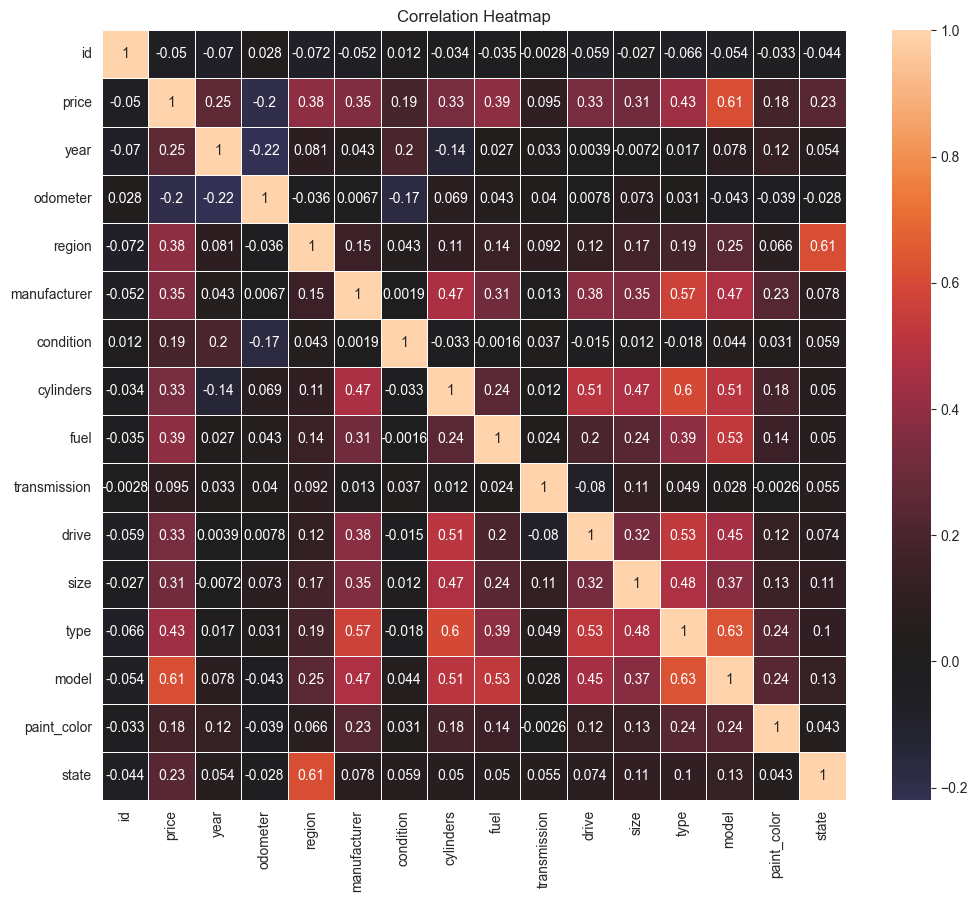

In [8]:
te = TargetEncoder()
TargetEncoded_df = te.fit_transform(df[["region","manufacturer","condition","cylinders","fuel","transmission", "drive", "size", "type", "model","paint_color","state"]], df["price"])

selected_columns_from_df = df[['id', 'price', 'year','odometer' ]]   
Corr_df = pd.concat([selected_columns_from_df, TargetEncoded_df], axis=1)

#correlation heatmap   
sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots(figsize=(12, 10)) 
sns.heatmap(Corr_df.corr(), center = 0, linewidth = .5, annot = True).set(title='Correlation Heatmap');

<span style="background-color: yellow; padding: 3px; font-weight: bold;">Drop unwanted features</span>

In [9]:
dropped_cols =['id','region','title_status','VIN','paint_color','state','model']
df=df.drop(columns = dropped_cols)

<span style="background-color: yellow; padding: 3px; font-weight: bold;">Plot histogram of numerical features</span>

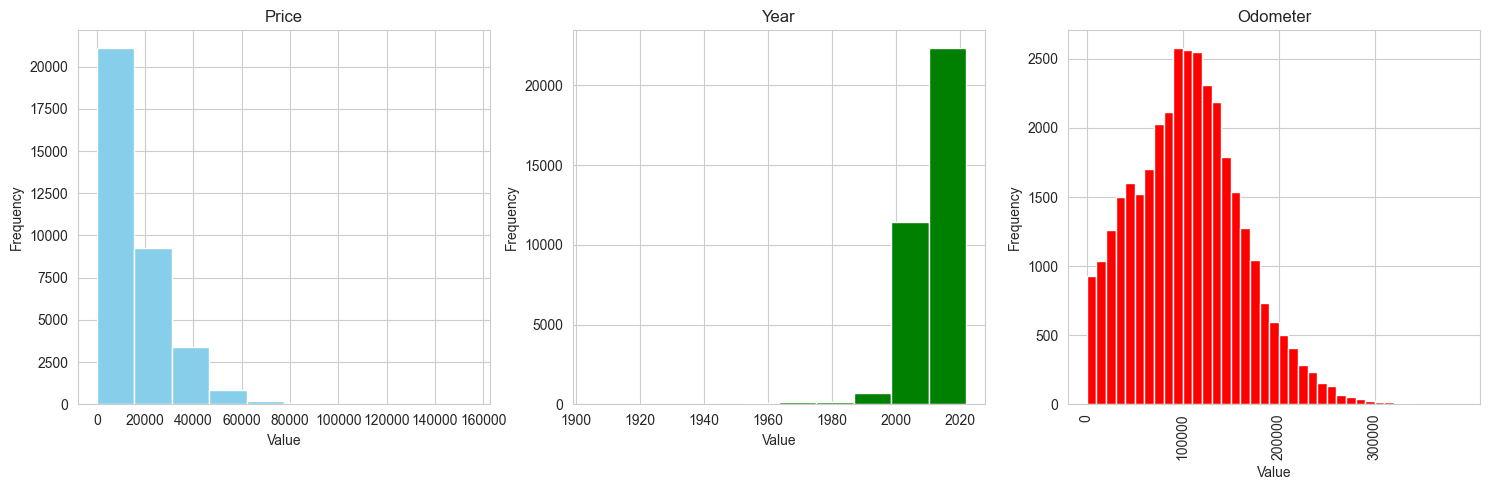

In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Create a figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the histograms on each subplot
df.hist(column='price', color='skyblue', ax=axes[0])
axes[0].set_title('Price')

df.hist(column='year', color='green', ax=axes[1])
axes[1].set_title('Year')

# Customization for the odometer histogram
bins = range(0, 400000, 10000)
ax = axes[2]
n, bins, patches = ax.hist(df['odometer'], bins=bins, color='red')
ax.set_title('Odometer')

ax.set_xticks(range(0, 400000, 100000)) 

# Rotate the x-tick labels to prevent overlapping
for label in ax.get_xticklabels():
    label.set_rotation(90)
 
# Set common x and y labels for all subplots
for ax in axes:
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show() 

<span style="background-color: yellow; padding: 1px; font-weight: bold;">Address outliers in the numerical features</span>

In [11]:
def outlierstreat(data,variable):
    first_quartile=data[variable].quantile(0.25)
    third_quartile=data[variable].quantile(0.75)
    iqr= third_quartile - first_quartile
    lower=first_quartile - 1.5*iqr
    lower=0 if lower<0 else lower
    upper=third_quartile + 1.5*iqr
    0 if upper<0 else upper
    print(f"Lower limit for {variable} is {round(lower)} and the upper limit is {round(upper)}")
    data=data[(data[variable] < upper) &  (data[variable] > lower)]
    return data

variables=["price","odometer","year"]
for variable in variables:
    df=outlierstreat(df,variable)

Lower limit for price is 0 and the upper limit is 45259
Lower limit for odometer is 0 and the upper limit is 255000
Lower limit for year is 1998 and the upper limit is 2026


<span style="background-color: yellow; padding: 3px; font-weight: bold; color:black;">Encode Categorical Features</span>

In [12]:
# Already dropped cols ['id','region','title_status','VIN','paint_color','state','model']
encoded_df = pd.get_dummies(df, dtype=int, columns=['cylinders', 'transmission', 'condition', 'manufacturer','drive','type', 'fuel','size'])
encoded_df = encoded_df.drop(columns =['year', 'odometer','price'])
df = df.drop(columns=['cylinders', 'transmission', 'condition', 'manufacturer', 'fuel','drive','size','type'])
df = pd.concat([df, encoded_df], axis=1)
df.head()

,price,year,odometer,cylinders_10 cylinders,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,...,type_wagon,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other_fuel,size_compact,size_full-size,size_mid-size,size_sub-compact
215,4000,2002,155000,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
268,9000,2008,56700,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
337,8950,2011,164000,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
355,9400,2008,129473,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
364,7300,2007,181000,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

<span style="background-color: green; padding: 3px; font-weight: bold; color:white;">Perform Permutation Importance w/ Linear Regression</span>

In [13]:
pd.set_option('display.float_format', '{:.3f}'.format)
X = df.drop(['price'], axis = 1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

model = LinearRegression()
model.fit(X_train, y_train)

# Calculate permutation importances
perm_importance = permutation_importance(model, X_train, y_train, n_repeats=30, random_state=42, n_jobs=-1)
importances = pd.DataFrame(data=perm_importance.importances_mean, index=X_train.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
pd.set_option('display.precision', 3)
importances.head(5)

,Importance
year,0.335
odometer,0.169
fuel_diesel,0.081
cylinders_8 cylinders,0.062
type_truck,0.060


<span style="background-color: green; padding: 3px; font-weight: bold; color:white;">Build Linear Regression</span>

Training Mean Squared Error: 41286659.83
Training R-squared: 0.62

Test Mean Squared Error: 42437489.23
Test R-squared: 0.61


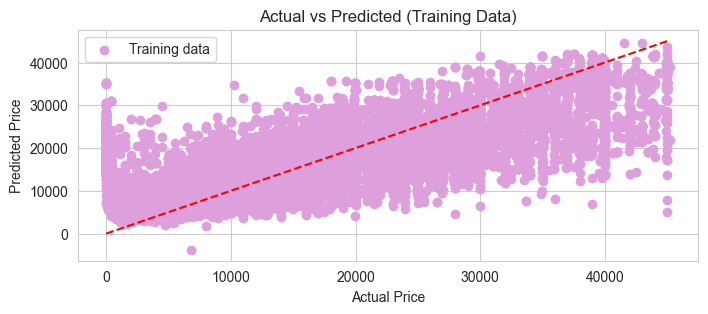

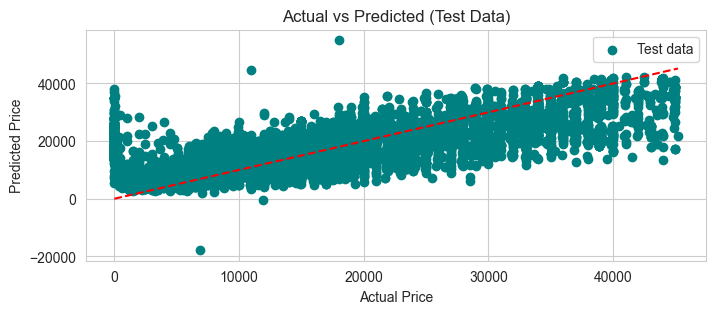

In [14]:
X = df[['year','odometer','fuel_diesel','cylinders_8 cylinders','type_truck']] 
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

#Build transformers
num_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler() 
polynomial_features = PolynomialFeatures(degree=6, include_bias=False)
log_transformer = FunctionTransformer(np.log1p, validate=False)
numerical_features = ['year','odometer','fuel_diesel','cylinders_8 cylinders','type_truck'] 
odometer_feature = ['odometer']

# Create a preprocessing pipeline for numerical data
num_pipeline = Pipeline([
    ('imputer', num_imputer),
    ('scaler', scaler),
    ('poly', polynomial_features)
])
 
odometer_pipeline = Pipeline([
    ('imputer', num_imputer),
    ('log', log_transformer),
    ('scaler', scaler)
])

# Combine preprocessing pipelines for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numerical_features),
        ('odometer', odometer_pipeline, odometer_feature)
    ])   

# Create the full pipeline with Linear Regression model
model = Pipeline([
    ('preprocessor', preprocessor), 
    ('model', LinearRegression())
])

# Fit the Model with train data
model.fit(X_train, y_train)

# Predict using the model
train_pred = model.predict(X_train) 
test_pred = model.predict(X_test) 

train_mse = mean_squared_error(y_train, train_pred)
train_r2 = r2_score(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)

print(f"Training Mean Squared Error: {train_mse:.2f}")
print(f"Training R-squared: {train_r2:.2f}")
print(f"\nTest Mean Squared Error: {test_mse:.2f}")
print(f"Test R-squared: {test_r2:.2f}")
 
# Plotting actual vs predicted for training data
plt.figure(figsize=(8,3))
plt.scatter(y_train, train_pred, color='plum', label='Training data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--', color='red')  # Diagonal line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted (Training Data)')
plt.legend()
plt.show()

# Plotting actual vs predicted for test data
plt.figure(figsize=(8,3))
plt.scatter(y_test, test_pred, color='teal', label='Test data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted (Test Data)')
plt.legend()
plt.show()

<span style="background-color: blue; padding: 3px; font-weight: bold; color:white;">Perform Permutation Importance w/ Ridge Regression </span>

In [15]:
pd.set_option('display.float_format', '{:.3f}'.format)
X = df.drop(['price'], axis = 1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# Calculate permutation importances
perm_importance = permutation_importance(model, X_train, y_train, n_repeats=30, random_state=42, n_jobs=-1)
importances = pd.DataFrame(data=perm_importance.importances_mean, index=X_train.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
importances.head(10)

,Importance
year,0.335
odometer,0.169
fuel_diesel,0.079
cylinders_8 cylinders,0.064
type_truck,0.060
type_sedan,0.039
transmission_other_transmission,0.035
transmission_manual,0.029
transmission_automatic,0.014
cylinders_6 cylinders,0.012


<span style="background-color: blue; padding: 3px; font-weight: bold; color:white;">Build Ridge Regression w/ K-Fold and Grid Search CV [Neg. MSE] </span>

Training Mean Squared Error: 32832136.99
Training R-squared: 0.70

Test Mean Squared Error: 33637743.61
Test R-squared: 0.69

Best parameters: {'regressor__alpha': 100.0}
Best cross-validation score: 33190362.32


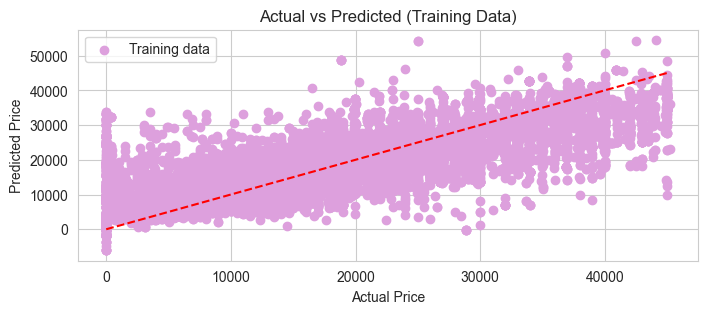

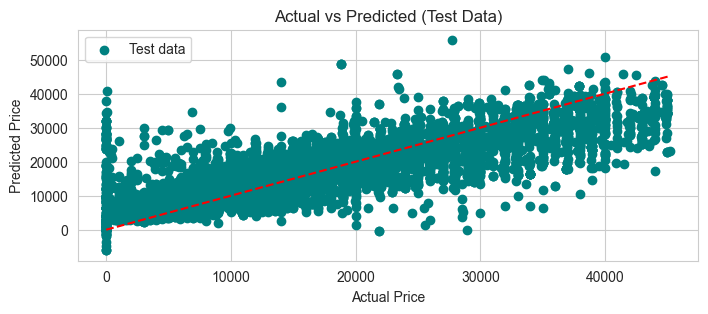

In [16]:
X = df[['year','odometer','fuel_diesel','cylinders_8 cylinders','type_truck','type_sedan','transmission_other_transmission','transmission_manual','transmission_automatic','cylinders_6 cylinders']] 
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

#Build transformers
num_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()  
polynomial_features = PolynomialFeatures(degree=3, include_bias=False)
log_transformer = FunctionTransformer(np.log1p, validate=False)
numerical_features = ['year','fuel_diesel','cylinders_8 cylinders','type_truck','type_sedan','transmission_other_transmission','transmission_manual','transmission_automatic','cylinders_6 cylinders'] 
odometer_feature = ['odometer']

# Create a preprocessing pipeline for numerical data
num_pipeline = Pipeline([
    ('imputer', num_imputer),
    ('scaler', scaler),
    ('poly', polynomial_features) 
])

# Odometer pipeline with log transformation
odometer_pipeline = Pipeline([
    ('imputer', num_imputer),
    ('log', log_transformer),
    ('scaler', scaler)
])

# Combine preprocessing pipelines for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numerical_features),
        ('odometer', odometer_pipeline, odometer_feature)
    ])  
regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=10))
])

# Parameter grid for GridSearchCV
param_grid = {
    'regressor__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
}

kf = KFold(n_splits=10, shuffle=True, random_state=22) 

# Setup the GridSearchCV
grid_search = GridSearchCV(regression_pipeline,
                           param_grid,
                           scoring='neg_mean_squared_error',
                           cv=kf,
                           n_jobs=-1)

# grid_search = GridSearchCV(regression_pipeline,
#                            param_grid,
#                            scoring='r2',
#                            cv=kf,
#                            n_jobs=-1)


# Fit model
grid_search.fit(X_train, y_train)

# Get the best model after GridSearch
best_model = grid_search.best_estimator_

# Predict using the best model
train_pred = best_model.predict(X_train) 
test_pred = best_model.predict(X_test) 

train_mse = mean_squared_error(y_train, train_pred)
train_r2 = r2_score(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)

print(f"Training Mean Squared Error: {train_mse:.2f}")
print(f"Training R-squared: {train_r2:.2f}")
print(f"\nTest Mean Squared Error: {test_mse:.2f}")
print(f"Test R-squared: {test_r2:.2f}")
print("\nBest parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(-grid_search.best_score_))

# Plotting actual vs predicted for training data
plt.figure(figsize=(8,3))
plt.scatter(y_train, train_pred, color='plum', label='Training data')  # Train data points
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--', color='red')  # Diagonal line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted (Training Data)')
plt.legend()
plt.show()

# Plotting actual vs predicted for test data
plt.figure(figsize=(8,3))
plt.scatter(y_test, test_pred, color='teal', label='Test data')  # Test data points
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Diagonal line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted (Test Data)')
plt.legend()
plt.show()


<span style="background-color: Aqua; padding: 3px; font-weight: bold; color:black;">Perform Sequential Feature Selection w/ Lasso Regression</span>

In [17]:
X = df.drop(['price'], axis = 1) 
y = df['price']
sfs = SequentialFeatureSelector(estimator = Lasso(alpha=1.0),
                                scoring = "neg_mean_squared_error",
                                cv = 5,
                                n_features_to_select = 10)
sfs.fit(X, y)
sfs.get_feature_names_out(input_features=None)

array(['year', 'odometer', 'cylinders_4 cylinders',
       'cylinders_8 cylinders', 'transmission_other_transmission',
       'drive_fwd', 'type_pickup', 'type_sedan', 'type_truck',
       'fuel_diesel'], dtype=object)

<span style="background-color: aqua; padding: 3px; font-weight: bold; color:black;">Build Lasso Regression w/ K-Fold and Grid Search CV </span>

Training Mean Squared Error: 32154825.44
Training R-squared: 0.70

Test Mean Squared Error: 32957940.07
Test R-squared: 0.70

Best parameters: {'regressor__alpha': 100.0}
Best cross-validation score: -0.70


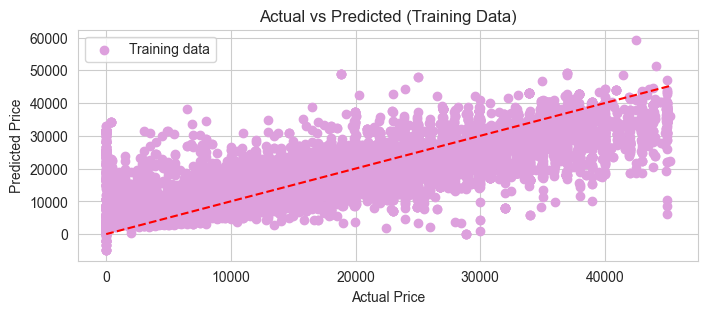

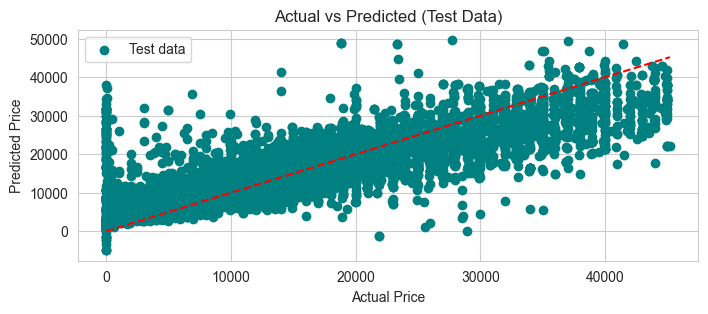

In [18]:
X = df[['year','odometer','cylinders_4 cylinders','cylinders_8 cylinders','transmission_other_transmission','drive_fwd','type_pickup','type_sedan','type_truck','fuel_diesel']] 
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

#Build transformers
num_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()  
polynomial_features = PolynomialFeatures(degree=4, include_bias=False)
log_transformer = FunctionTransformer(np.log1p, validate=False)
numerical_features = ['year','cylinders_4 cylinders','cylinders_8 cylinders','transmission_other_transmission','drive_fwd','type_pickup','type_sedan','type_truck','fuel_diesel'] 
odometer_feature = ['odometer']

# Create a preprocessing pipeline for numerical data
num_pipeline = Pipeline([
    ('imputer', num_imputer),
    ('scaler', scaler),
    ('poly', polynomial_features) 
])

# Odometer pipeline with log transformation
odometer_pipeline = Pipeline([
    ('imputer', num_imputer),
    ('log', log_transformer),
    ('scaler', scaler)
])

# Combine preprocessing pipelines for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numerical_features),
        ('odometer', odometer_pipeline, odometer_feature)
    ])  
regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha =1))
])

# Parameter grid for GridSearchCV
param_grid = {
    'regressor__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
}

kf = KFold(n_splits=10, shuffle=True, random_state=22) 

grid_search = GridSearchCV(regression_pipeline,
                           param_grid,
                           scoring='r2',
                           cv=kf,
                           n_jobs=-1)

# Fit model
grid_search.fit(X_train, y_train)

# Get the best model after GridSearch
best_model = grid_search.best_estimator_

# Predict using the best model
train_pred = best_model.predict(X_train) 
test_pred = best_model.predict(X_test) 

train_mse = mean_squared_error(y_train, train_pred)
train_r2 = r2_score(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)

print(f"Training Mean Squared Error: {train_mse:.2f}")
print(f"Training R-squared: {train_r2:.2f}")
print(f"\nTest Mean Squared Error: {test_mse:.2f}")
print(f"Test R-squared: {test_r2:.2f}")
print("\nBest parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(-grid_search.best_score_))

# Plotting actual vs predicted for training data
plt.figure(figsize=(8, 3))
plt.scatter(y_train, train_pred, color='plum', label='Training data')  # Train data points
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--', color='red')  # Diagonal line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted (Training Data)')
plt.legend()
plt.show()

# Plotting actual vs predicted for test data
plt.figure(figsize=(8, 3))
plt.scatter(y_test, test_pred, color='teal', label='Test data')  # Test data points
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Diagonal line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted (Test Data)')
plt.legend()
plt.show();


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

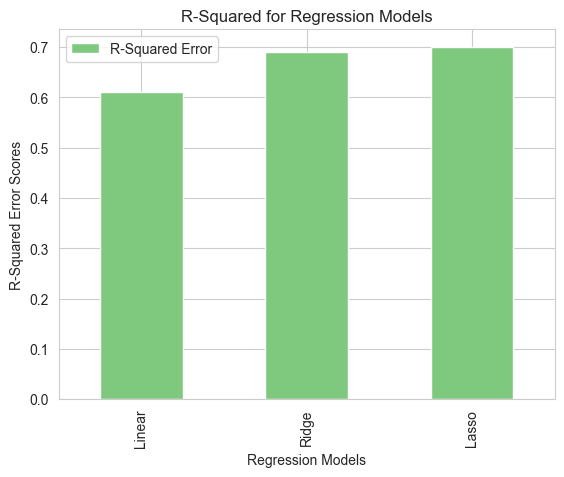

In [19]:
R_Squared = pd.DataFrame({"R-Squared Error": [ 0.61, 0.69, 0.70]}, index=["Linear", "Ridge", "Lasso"]) 
R_Squared.plot(kind="bar", stacked=True, colormap='Accent')
plt.title("R-Squared for Regression Models")
plt.xlabel("Regression Models")
plt.ylabel("R-Squared Error Scores");

In [14]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
df=pd.read_csv("C:/ML-AI Training/PA2/data/vehicles.csv") 
df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


<span style="background-color: purple; padding: 3px; font-weight: bold; color:white;">Re-treat the outliers</span>

In [15]:
def outlierstreat(data,variable):
    first_quartile=data[variable].quantile(0.25)
    third_quartile=data[variable].quantile(0.75)
    iqr= third_quartile - first_quartile
    lower=first_quartile - 1.5*iqr
    lower=0 if lower<0 else lower
    upper=third_quartile + 1.5*iqr
    0 if upper<0 else upper
    print(f"Lower limit for {variable} is {round(lower)} and the upper limit is {round(upper)}")
    data=data[(data[variable] < upper) &  (data[variable] > lower)]
    return data

variables=["price","odometer","year"]
for variable in variables:
    df=outlierstreat(df,variable)


Lower limit for price is 0 and the upper limit is 57364
Lower limit for odometer is 0 and the upper limit is 281834
Lower limit for year is 1994 and the upper limit is 2030


<span style="background-color: purple; padding: 3px; font-weight: bold; color:white;">Price Descriptive Stats</span>

In [16]:
df.price.describe()

count   363461
mean     17993
std      12758
min          1
25%       7350
50%      15000
75%      26990
max      57341
Name: price, dtype: float64

<span style="background-color: purple; padding: 3px; font-weight: bold; color:white;">Odometer Descriptive Stats</span>

In [17]:
df.odometer.describe()

count   363461
mean     92759
std      60697
min          1
25%      39792
50%      89000
75%     135754
max     281794
Name: odometer, dtype: float64

<span style="background-color: purple; padding: 3px; font-weight: bold; color:white;">Year Descriptive Stats</span>

In [18]:
df.year.describe()

count   363461
mean      2012
std          5
min       1995
25%       2009
50%       2013
75%       2017
max       2022
Name: year, dtype: float64

<span style="background-color: purple; padding: 3px; font-weight: bold; color:white;">Categorize Price into Low, Medium, and High </span>


In [19]:
quantile_bins = np.quantile(df['price'], [0, 1/3, 2/3, 1])
labels = ['Low', 'Med', 'High']
df['price_cat'] = pd.cut(df['price'], bins=quantile_bins, labels=labels, include_lowest=True) 
df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,price_cat
27,7316814884,auburn,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,al,High
28,7316814758,auburn,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,al,Med
29,7316814989,auburn,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,al,High
30,7316743432,auburn,30990,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124,clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,al,High
31,7316356412,auburn,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000,clean,automatic,NaN,rwd,full-size,truck,black,al,Med
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy,High
426876,7301591187,wyoming,30590,2020,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy,High
426877,7301591147,wyoming,34990,2020,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy,High
426878,7301591140,wyoming,28990,2018,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy,High


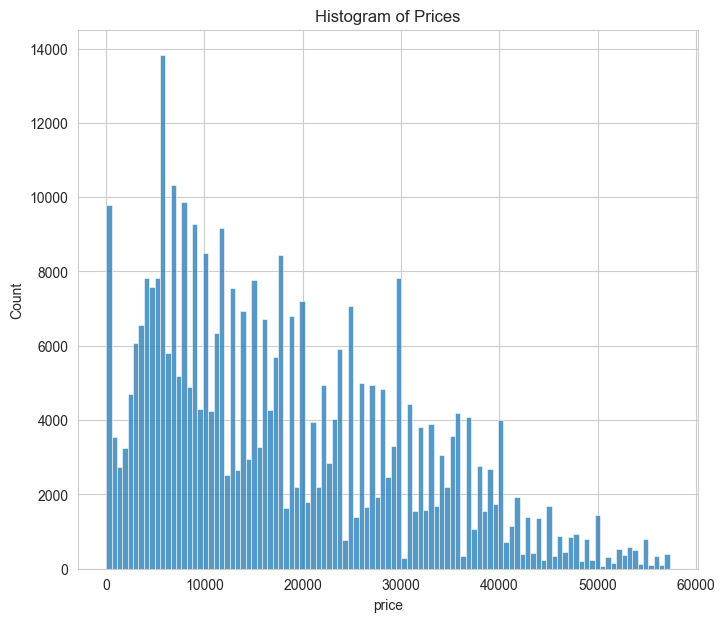

In [20]:
#histogram of price 
plt.figure(figsize = (8, 7))
sns.histplot(data = df, x = "price", stat = "count").set(title = "Histogram of Prices");

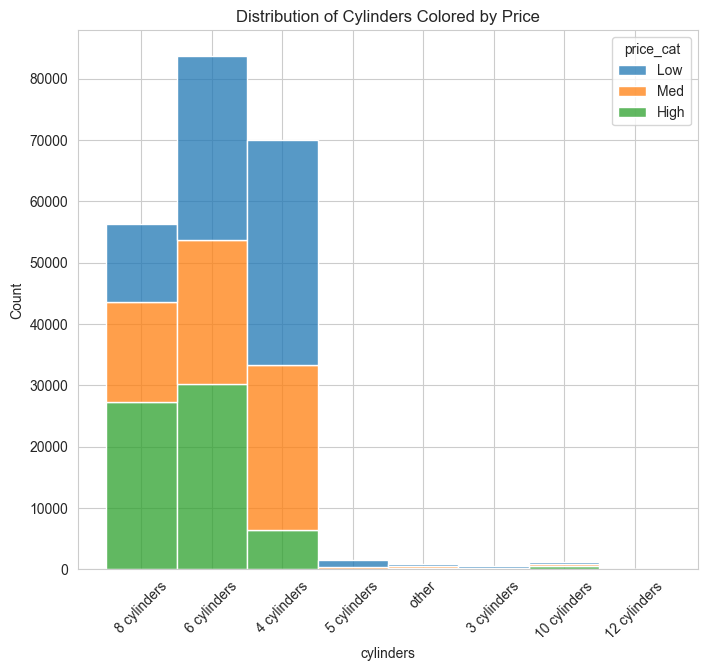

In [21]:
#histogram of cylinders colored by price 
plt.figure(figsize = (8, 7))
sns.histplot(df, x = "cylinders", hue = "price_cat", multiple = "stack").set(title = "Distribution of Cylinders Colored by Price")
plt.xticks(rotation = 45);

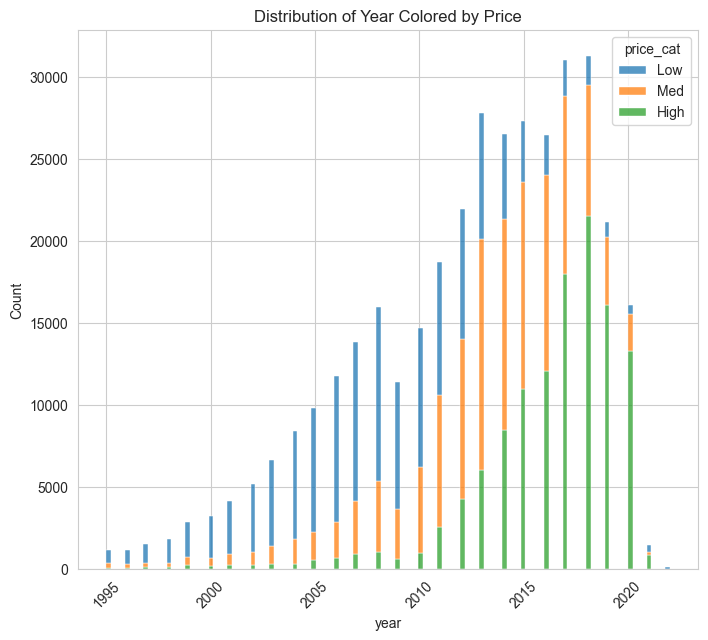

In [22]:
#histogram of year colored by price 
plt.figure(figsize = (8, 7))
sns.histplot(df, x = "year", hue = "price_cat", multiple = "stack").set(title = "Distribution of Year Colored by Price")
plt.xticks(rotation = 45);

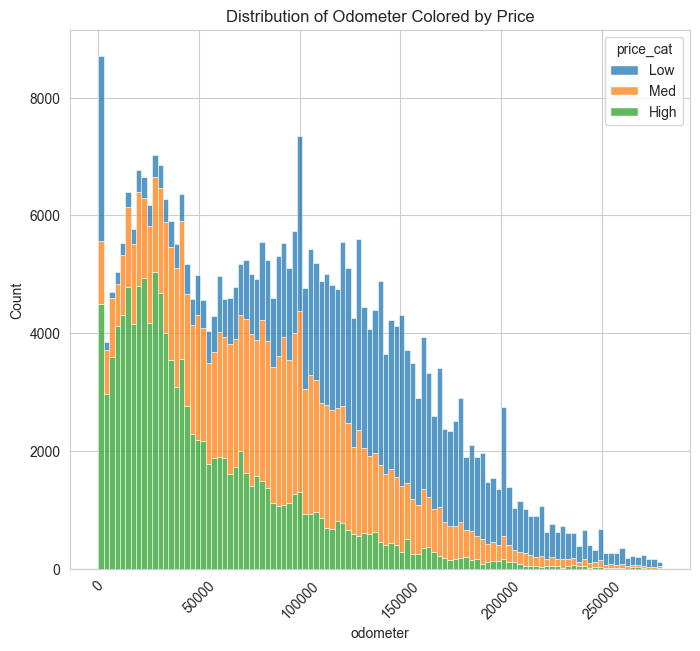

In [23]:
#histogram of odometer colored by price 
plt.figure(figsize = (8, 7))
sns.histplot(df[df["odometer"] < 280000], x = "odometer", hue = "price_cat", multiple = "stack").set(title = "Distribution of Odometer Colored by Price")
plt.xticks(rotation = 45);

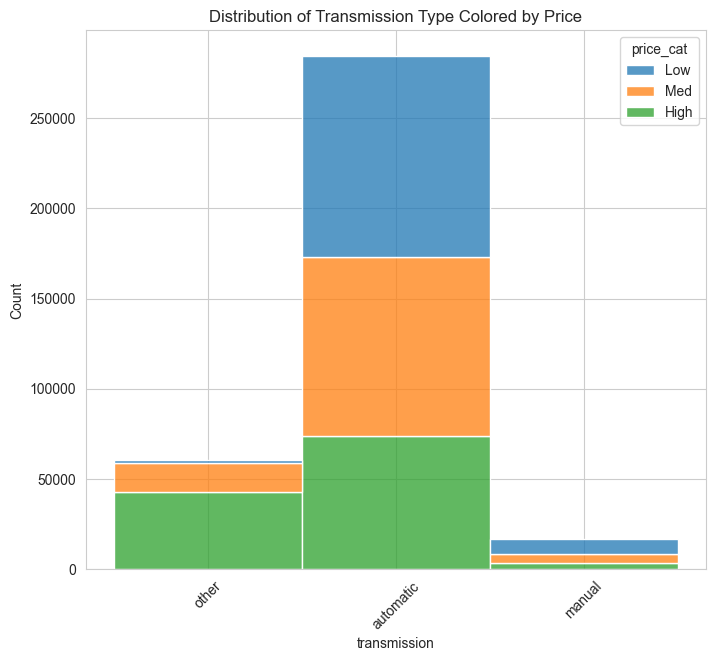

In [28]:
#histogram of transmission colored by price 
plt.figure(figsize = (8, 7))
sns.histplot(df, x = "transmission", hue = "price_cat", multiple = "stack").set(title = "Distribution of Transmission Type Colored by Price")
plt.xticks(rotation = 45);

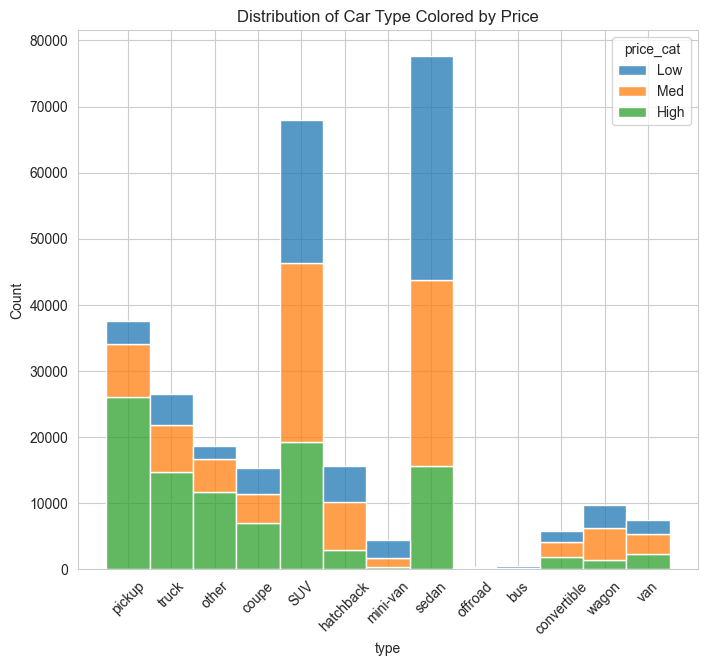

In [29]:
#histogram of type colored by price 
plt.figure(figsize = (8, 7))
sns.histplot(df, x = "type", hue = "price_cat", multiple = "stack").set(title = "Distribution of Car Type Colored by Price")
plt.xticks(rotation = 45);

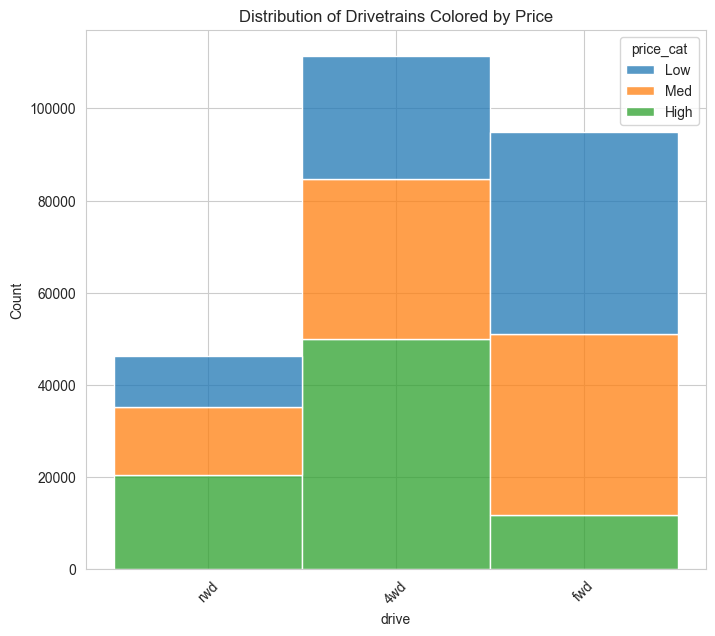

In [30]:
#histogram of drive colored by price 
plt.figure(figsize = (8, 7))
sns.histplot(df, x = "drive", hue = "price_cat", multiple = "stack").set(title = "Distribution of Drivetrains Colored by Price")
plt.xticks(rotation = 45);

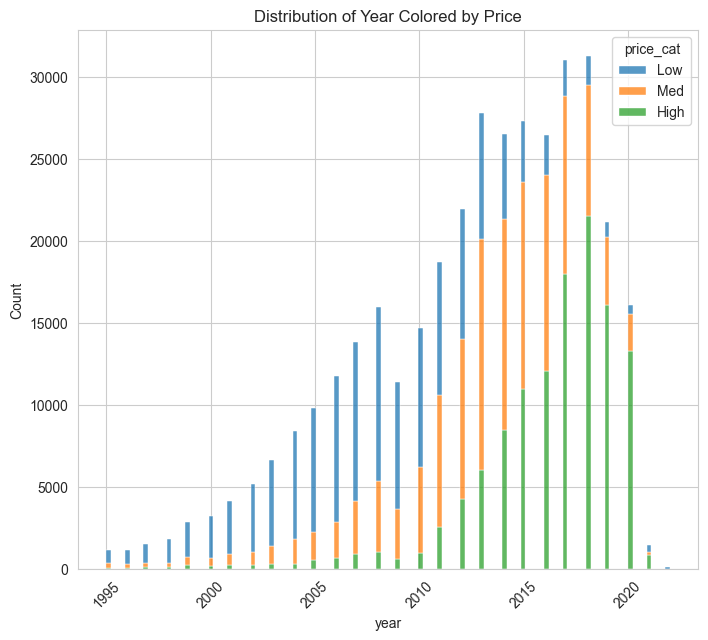

In [33]:
#histogram of year colored by price 
plt.figure(figsize = (8, 7))
sns.histplot(df, x = "year", hue = "price_cat", multiple = "stack").set(title = "Distribution of Year Colored by Price")
plt.xticks(rotation = 45);

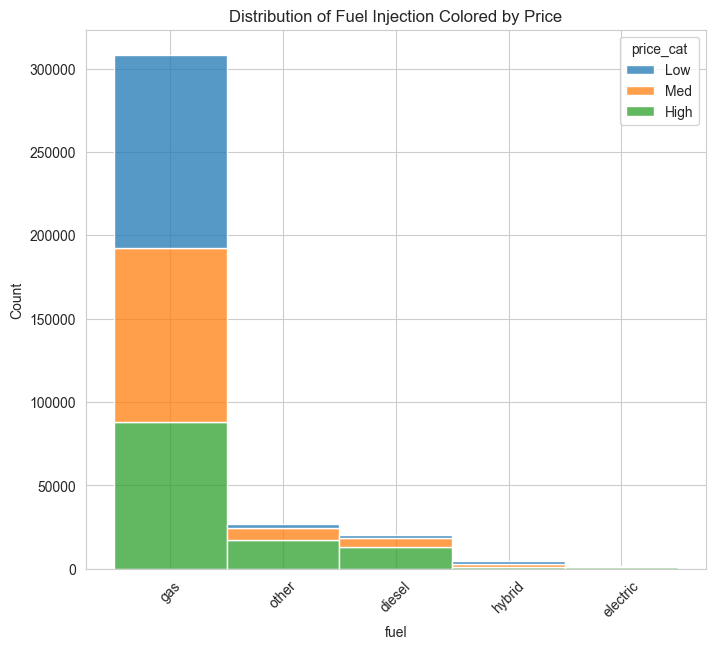

In [31]:
#histogram of fuel colored by price 
plt.figure(figsize = (8, 7))
sns.histplot(df, x = "fuel", hue = "price_cat", multiple = "stack").set(title = "Distribution of Fuel Injection Colored by Price")
plt.xticks(rotation = 45);

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.